### PROBLEM

Return to your Ames Data.  We have covered a lot of ground today, so let's summarize the things we could do to improve the performance of our original model that compared the Above Ground Living Area to the Logarithm of the Sale Price.
<div class="alert alert-info" role="alert">
1. Clean data, drop missing values
2. Transform data, code variables using either ordinal values or OneHotEncoder methods
3. Create more features from existing features
4. Split our data into testing and training sets
5. Normalize quantitative features
6. Use Regularized Regression methods and Polynomial regression to improve performance of model
</div>
Can you use some or all of these ideas to improve upon your initial model?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import statsmodels.formula.api as smf

# set chart style
%matplotlib inline
sns.set(style='ticks')

# set laptop location
home = '/Users/karenhao/'
office = '/users/khao/'

location = home+'Google Drive/02 Working/Quartz/Education/GA Data Science/DAT-NYC-6.13'

### load data

In [2]:
# load in data
os.chdir(location+'/data')
ames_raw = pd.read_csv('ames_housing.csv')

In [3]:
ames_raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### examine data

In [4]:
ames_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### fill in null values

In [21]:
ames = ames_raw.copy()

ames['LotFrontage'] = ames['LotFrontage'].fillna(ames['LotFrontage'].median())
ames['Alley'] = ames['Alley'].fillna("None")
ames['MasVnrType'] = ames['MasVnrType'].fillna("None")
ames['MasVnrArea'] = ames['MasVnrArea'].fillna(0)
ames['BsmtQual'] = ames['BsmtQual'].fillna("None")
ames['BsmtCond'] = ames['BsmtCond'].fillna("None")
ames['BsmtExposure'] = ames['BsmtExposure'].fillna("None")
ames['BsmtFinType1'] = ames['BsmtFinType1'].fillna("None")
ames['BsmtFinType2'] = ames['BsmtFinType2'].fillna("None")
ames['Electrical'] = ames['Electrical'].fillna("None")
ames['FireplaceQu'] = ames['FireplaceQu'].fillna("None")
ames['GarageType'] = ames['GarageType'].fillna("None")
ames['GarageYrBlt'] = ames['GarageYrBlt'].fillna("None")
ames['GarageFinish'] = ames['GarageFinish'].fillna("None")
ames['GarageQual'] = ames['GarageQual'].fillna("None")
ames['GarageCond'] = ames['GarageCond'].fillna("None")
ames['PoolQC'] = ames['PoolQC'].fillna("None")
ames['Fence'] = ames['Fence'].fillna("None")
ames['MiscFeature'] = ames['MiscFeature'].fillna("None")

### eliminate outliers

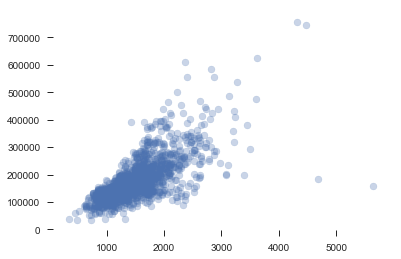

In [22]:
# plot to check for outliers
plt.scatter(ames.GrLivArea, ames.SalePrice, alpha=0.3)
sns.despine(left=True,bottom=True)

In [23]:
# author of ames dataset recommends dropping anything more than 4000 sf
ames = ames[ames['GrLivArea']<4000]

### transform data

In [24]:
# numeric that are actually categorical
ames['MSSubClass'] = ames['MSSubClass'].apply(lambda x: str(x))
ames['MoSold'] = ames['MoSold'].apply(lambda x: str(x))

# ordinal --> numeric
ames = ames.replace({"LotShape" : {"IR3":1, "IR2":2, "IR1":3, "Reg":4}})
ames = ames.replace({"Utilities" : {"NoSeWa":2, "AllPub":4}})
ames = ames.replace({"LandSlope" : {"Sev":1, "Mod":2, "Gtl":3}})
ames = ames.replace({"ExterQual" : {"Fa":2, "TA":3, "Gd":4, "Ex":5}})
ames = ames.replace({"ExterCond" : {"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}})
ames = ames.replace({"BsmtQual" : {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}})
ames = ames.replace({"BsmtCond" : {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}})
ames = ames.replace({"BsmtExposure" : {"None":0, "No":1, "Mn":2, "Av":3, "Gd":4}})
ames = ames.replace({"BsmtFinType1" : {"None":0, "Unf":1, "LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6}})
ames = ames.replace({"BsmtFinType2" : {"None":0, "Unf":1, "LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6}})
ames = ames.replace({"HeatingQC" : {"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}})
ames = ames.replace({"Electrical" : {"None":0, "Mix":1, "FuseP":2, "FuseF":3, "FuseA":4, "SBrkr":5}})
ames = ames.replace({"KitchenQual" : {"Fa":2, "TA":3, "Gd":4, "Ex":5}})
ames = ames.replace({"Functional" : {"Sev":2, "Maj2":3, "Maj1":4, "Mod":5, "Min2":6, "Min1":7, "Typ":8}})
ames = ames.replace({"FireplaceQu" : {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}})
ames = ames.replace({"GarageFinish" : {"None":0, "Unf":1, "RFn":2, "Fin":3}})
ames = ames.replace({"GarageQual" : {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}})
ames = ames.replace({"GarageCond" : {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}})
ames = ames.replace({"PavedDrive" : {"N":0, "P":1, "Y":2}})
ames = ames.replace({"PoolQC" : {"None":0, "Fa":1, "Gd":3, "Ex":4}})
ames = ames.replace({"Fence" : {"None":0, "MnWw":1, "GdWo":2, "MnPrv":3, "GdPrv":4}})

### create new features

In [49]:
ames_compact = ames.copy()

# combine features
ames_compact["OverallScore"] = ames_compact["OverallQual"] * ames_compact["OverallCond"]
ames_compact["GarageScore"] = ames_compact["GarageQual"] * ames_compact["GarageCond"] * ames_compact["GarageArea"]
ames_compact["ExterScore"] = ames_compact["ExterQual"] * ames_compact["ExterCond"]
ames_compact["KitchenScore"] = ames_compact["KitchenAbvGr"] * ames_compact["KitchenQual"]
ames_compact["FireplaceScore"] = ames_compact["Fireplaces"] * ames_compact["FireplaceQu"]
ames_compact["PoolScore"] = ames_compact["PoolArea"] * ames_compact["PoolQC"]
ames_compact["TotalBath"] = ames_compact["BsmtFullBath"] + (0.5 * ames_compact["BsmtHalfBath"]) + ames_compact["FullBath"] + (0.5 * ames_compact["HalfBath"])
ames_compact["AllSF"] = ames_compact["GrLivArea"] + ames_compact["TotalBsmtSF"]
ames_compact["FlrsSF"] = ames_compact["1stFlrSF"] + ames_compact["2ndFlrSF"]
ames_compact["PorchSF"] = ames_compact["OpenPorchSF"] + ames_compact["EnclosedPorch"] + ames_compact["3SsnPorch"] + ames_compact["ScreenPorch"]

# drop original features
ames_compact.drop(["OverallQual","OverallCond","GarageQual","GarageCond","GarageArea","ExterQual","ExterCond",
                   "KitchenAbvGr","KitchenQual","Fireplaces","FireplaceQu","PoolArea","PoolQC","BsmtFullBath",
                   "BsmtHalfBath","FullBath","HalfBath","GrLivArea","TotalBsmtSF","1stFlrSF","2ndFlrSF",
                   "OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch"],axis=1,inplace=True)

# get dummies for nominal variables
nominal_features = ames_compact.select_dtypes(include = ["object"]).columns
ames_nominal = pd.get_dummies(ames_compact[nominal_features])

# merge nominal dummies and numeric
ames_numeric = ames_compact.drop(nominal_features,axis=1)
ames_compact = pd.concat([ames_numeric,ames_nominal], axis=1)


### eda

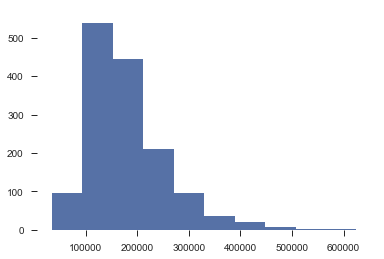

In [56]:
plt.hist(ames_compact.SalePrice,color='#5671A6')
sns.despine(left=True,bottom=True)

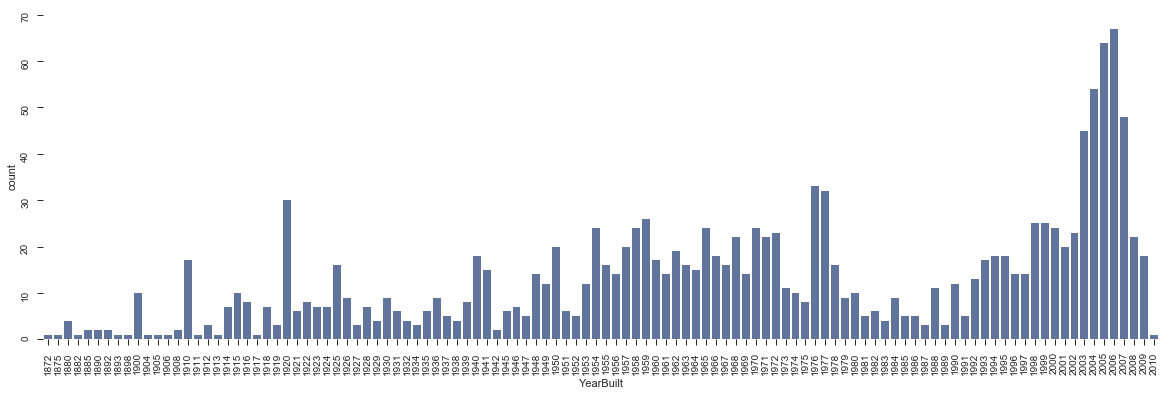

In [37]:
fig, ax = plt.subplots(figsize=(20,6))
sns.countplot('YearBuilt',data=ames_compact,ax=ax,color='#5671A6')
plt.tick_params(labelrotation = 90)
sns.despine(left=True,bottom=True)

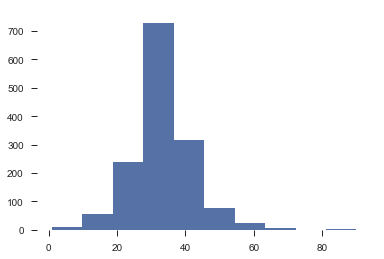

In [41]:
plt.hist(ames_compact.OverallScore,color='#5671A6')
sns.despine(left=True,bottom=True)

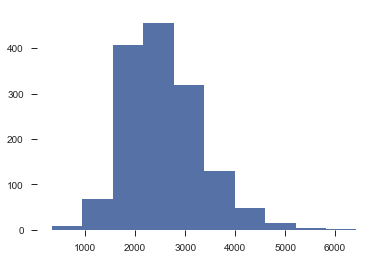

In [40]:
plt.hist(ames_compact.AllSF,color='#5671A6')
sns.despine(left=True,bottom=True)

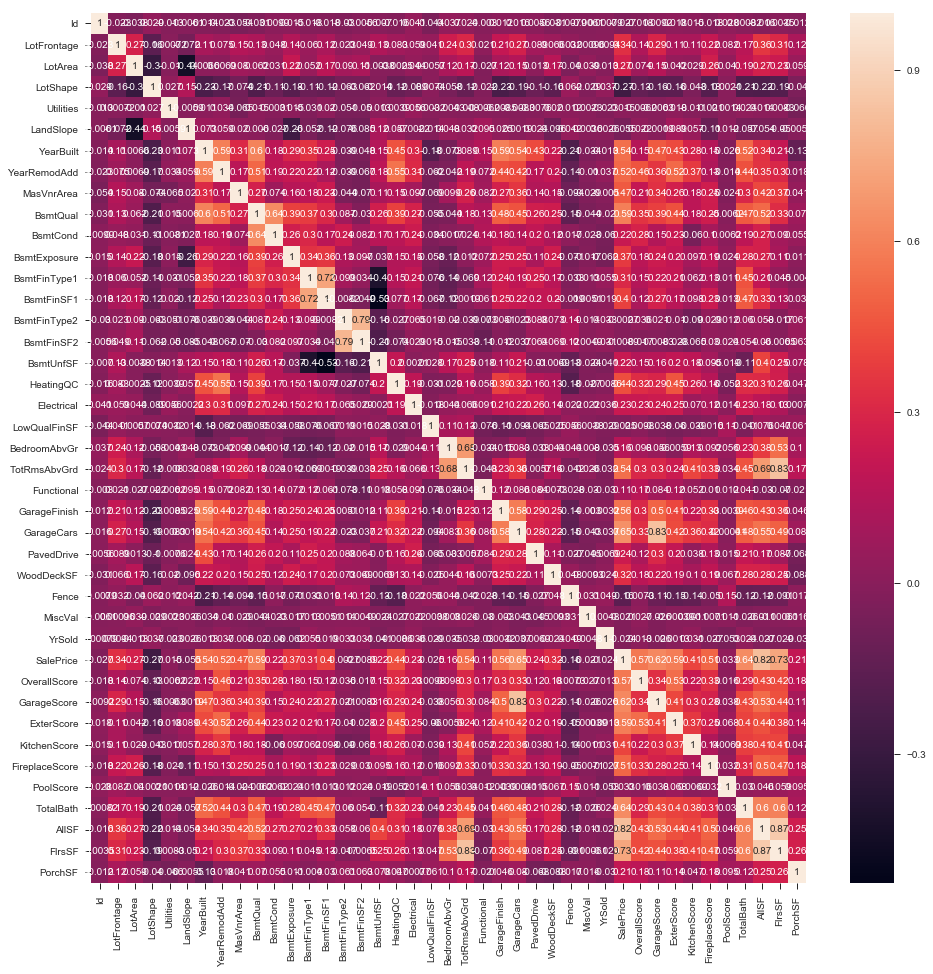

In [60]:
fig,ax = plt.subplots(figsize=(16,16))
sns.heatmap(ames_numeric.corr(),annot=True,ax=ax)

In [55]:
abs(ames_numeric.corr()['SalePrice']).sort_values(ascending=False)

SalePrice         1.000000
AllSF             0.821091
FlrsSF            0.729888
GarageCars        0.649256
TotalBath         0.635939
GarageScore       0.620281
BsmtQual          0.592073
ExterScore        0.586221
OverallScore      0.566514
GarageFinish      0.556808
TotRmsAbvGrd      0.537462
YearBuilt         0.535279
YearRemodAdd      0.521428
FireplaceScore    0.509796
MasVnrArea        0.473650
HeatingQC         0.435081
KitchenScore      0.407556
BsmtFinSF1        0.395923
BsmtExposure      0.373158
LotFrontage       0.338149
WoodDeckSF        0.322538
BsmtFinType1      0.305114
LotShape          0.270256
LotArea           0.269866
PavedDrive        0.237083
Electrical        0.229152
BsmtUnfSF         0.220678
BsmtCond          0.219340
PorchSF           0.206433
BedroomAbvGr      0.160542
Fence             0.160537
Functional        0.109250
LandSlope         0.055330
PoolScore         0.032876
Id                0.027455
LowQualFinSF      0.025351
YrSold            0.023694
M

### simple linear regression model

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [61]:
X = ames_compact[['AllSF','GarageCars','TotalBath']]
y = ames_compact['SalePrice']

In [62]:
lr = LinearRegression()

In [63]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
m = lr.coef_
b = lr.intercept_

print("m:",m)
print("b:",b)

m: [   59.00634952 25232.55817258 16484.64347583]
b: -51601.59767199209


In [66]:
y_pred = lr.predict(X)

In [67]:
mse = mean_squared_error(y_pred,y)
rmse = np.sqrt(mse)

print("The MSE is {:.3f} and RMSE is {:.3f}".format(mse,rmse))

The MSE is 1492060633.014 and RMSE is 38627.201


### compare to dummy model

In [68]:
from sklearn.dummy import DummyRegressor

In [69]:
base = DummyRegressor()

In [70]:
base.fit(X,y)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [71]:
y_base = base.predict(X)

In [72]:
mse_base = mean_squared_error(y_base,y)
rmse_base = np.sqrt(mse_base)

print("The MSE is {:.3f} and RMSE is {:.3f}".format(mse_base,rmse_base))

The MSE is 5878327218.285 and RMSE is 76670.250


### incorporate grid search into model

1. Clean up data by dropping or imputing missing values
2. Code categorical features
3. Split data into train and test set using `train_test_split`
3. Select a few features you believe important and evaluate a `DummyRegressor`
4. Compare the performance of your dummy to that of a standard `LinearRegression` model.
5. Build a model using `PolynomialFeatures` together with the `GridSearchCV`.  
6. Discuss the performance of each in terms of RMSE.

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [75]:
# split the training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [76]:
# create empty pipeline
pipe = make_pipeline(PolynomialFeatures(), LinearRegression())

In [77]:
# parameters for the pipeline
degrees = {'polynomialfeatures__degree': [i for i in range(1, 10)]}

In [78]:
# setup grid search
grid = GridSearchCV(pipe, param_grid=degrees)

In [80]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [86]:
best = grid.best_estimator_
best

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [88]:
best.fit(X_train, y_train)
y_best = best.predict(X_test)

mse_best = mean_squared_error(y_best,y_test)
rmse_best = np.sqrt(mse_best)

print("The MSE is {:.3f} and RMSE is {:.3f}".format(mse_best,rmse_best))

The MSE is 1143545969.969 and RMSE is 33816.357
